# Laboratory Session 05 : April 28, 2022
# Exercises due on : May 15, 2022

## Student: Capodaglio Alessandro Maria
## ID: 2039109

# Exercise 1 

## The number of particles emitted by a radioactive source during a fixed interval of time (∆t =10 s) follows a Poisson distribution on the parameter μ. The number of particles observed during consecutive time intervals is: 4, 1, 3, 1 and 3.

### a). suppose a uniform prior distribution for the parameter μ
- determine and draw the posterior distribution for μ, given the data
- evaluate mean, median and variance, both analytically and numerically in R

We know that the likelyhood is a poisson distribution, if we choose a uniform prior the posterior becomes a gamma distribution $Gamma(\alpha, \lambda)$, with:
- $\alpha = \sum y_{j} +1$ 
- $\lambda = n$
Where $y_{j}$ are the measurements.


### b) suppose a Jeffrey’s prior for the parameter μ
- determine and draw the posterior distribution for μ, given the data
- evaluate mean, median and variance, both analytically and numerically in R

If we choose Jeffrey's prior the posterior becomes a gamma distribution $Gamma(\alpha, \lambda)$, with:
- $\alpha = \sum y_{j} +1/2$ 
- $\lambda = n$
Where $y_{j}$ are the measurements.

In [1]:
library("ggplot2")

obs_particles <- c(4,1,3,1,3)

p_step <- 0.002
p <- seq(0,7, length.out = 1/p_step)



#-------------UNIFORM PRIOR--------------#

prior_unif <- function(x){
    return (dunif(x, 0,7))   
}


alpha_unif <- sum(obs_particles)+1
n <- length(obs_particles)

post_unif <- function(x){
    return (dgamma(x, shape = alpha_unif, rate = n))
}



#-------------JEFFREY'S PRIOR--------------#

prior_jeff <- function(p){
    normalize <- integrate(function(p){1/sqrt(p)}, lower = 0, upper = 7)$value
    return ((1/sqrt(p))/normalize)
}


alpha_jeff <- sum(obs_particles)+1/2
n <- length(obs_particles)

post_jeff <- function(x){
    return (dgamma(x, shape = alpha_jeff, rate = n))
}




#-------------PLOT--------------#



df_prob  <- data.frame(p, prior_unif(p), post_unif(p), prior_jeff(p), post_jeff(p))
options(repr.plot.width=22, repr.plot.height=8)

plot <-  ggplot() +
            geom_line(data = df_prob, mapping = aes(x=p, y= df_prob[,2],colour= 'Uniform Prior'), linetype ='dashed', size = 1.5, alpha = 0.8) +
            geom_line(data = df_prob, mapping = aes(x=p, y= df_prob[,3],colour= 'Posterior with uniform prior'), size = 1.5) +
            geom_line(data = df_prob, mapping = aes(x=p, y= df_prob[,4],colour= 'Jeffrey\'s Prior'), linetype ='dashed', size = 1.5, alpha = 0.7) +
            geom_line(data = df_prob, mapping = aes(x=p, y= df_prob[,5],colour= 'Posterior with Jeffrey\'s prior'), size = 1.5) +
            ggtitle('Priors and Posteriors')+
            theme_classic()+
            theme(text = element_text(size = 18)) +
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c("red", "black", "blue", "orange"),name = "")




plot

#-------------QUANTITIES OF INTEREST--------------#


unif_median <- qgamma(0.5, shape = alpha_unif, rate = n)
unif_mean_the<- alpha_unif/n
unif_var_the <- alpha_unif/(n*n)

unif_mean_ana <- integrate(function(p){p* dgamma(p, shape = alpha_unif, rate = n)}, lower = 0, upper = Inf)$value
unif_var_ana <- integrate(function(p){p*p* dgamma(p, shape = alpha_unif, rate = n)}, lower = 0, upper = Inf)$value - unif_mean_ana^2

jeff_median <- qgamma(0.5, shape = alpha_jeff, rate = n)
jeff_mean_the<- alpha_jeff/n
jeff_var_the <- alpha_jeff/(n*n)

jeff_mean_ana <- integrate(function(p){p* dgamma(p, shape = alpha_jeff, rate = n)}, lower = 0, upper = Inf)$value
jeff_var_ana <- integrate(function(p){p*p* dgamma(p, shape = alpha_jeff, rate = n)}, lower = 0, upper = Inf)$value - jeff_mean_ana^2

cat('\n-------------------UNIFORM PRIOR-------------------------')
cat(paste('\n The median of the posterior with uniform prior is ', unif_median), "")
cat(paste('\n The mean (calculated from the theory) for the posterior with uniform prior is ', unif_mean_the), "")
cat(paste('\n The mean (calculated numerically with R) for the posterior with uniform prior is ', unif_mean_ana), "")
cat(paste('\n The variance (calculated from the theory) for the posterior with uniform prior is ', unif_var_the), "")
cat(paste('\n The variance (calculated numerically with R) for the posterior with uniform prior is ', unif_var_ana), "")

cat('\n\ \n \n-------------------JEFFREY\'S PRIOR-------------------------')
cat(paste('\n The median of the posterior with jeffrey\'s prior is ', jeff_median), "")
cat(paste('\n The mean (calculated from the theory) for the posterior with jeffrey\'s prior is ', jeff_mean_the), "")
cat(paste('\n The mean (calculated numerically with R) for the posterior with jeffrey\'s prior is ', jeff_mean_ana), "")
cat(paste('\n The variance (calculated from the theory) for the posterior with jeffrey\'s prior is ', jeff_var_the), "")
cat(paste('\n The variance (calculated numerically with R) for the posterior with jeffrey\'s prior is ', jeff_var_ana), "")


-------------------UNIFORM PRIOR-------------------------
 The median of the posterior with uniform prior is  2.53364581174773 
 The mean (calculated from the theory) for the posterior with uniform prior is  2.6 
 The mean (calculated numerically with R) for the posterior with uniform prior is  2.60000000000019 
 The variance (calculated from the theory) for the posterior with uniform prior is  0.52 
 The variance (calculated numerically with R) for the posterior with uniform prior is  0.519999999999974 
 
 
-------------------JEFFREY'S PRIOR-------------------------
 The median of the posterior with jeffrey's prior is  2.43365866978843 
 The mean (calculated from the theory) for the posterior with jeffrey's prior is  2.5 
 The mean (calculated numerically with R) for the posterior with jeffrey's prior is  2.50000000000012 
 The variance (calculated from the theory) for the posterior with jeffrey's prior is  0.5 
 The variance (calculated numerically with R) for the posterior with jef

### c) evaluate a 95% credibility interval for the results obtained with both priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation


 The 95% C.I  for the posterior given a uniform prior is : [ 1.384 , 4.192 ]
 The 95% C.I  for the gaussian posterior with same parameters is : [ 1.187 , 4.013 ]
 The relative error for both cutoffs is respectively: ( 0.143 0.043 ) 

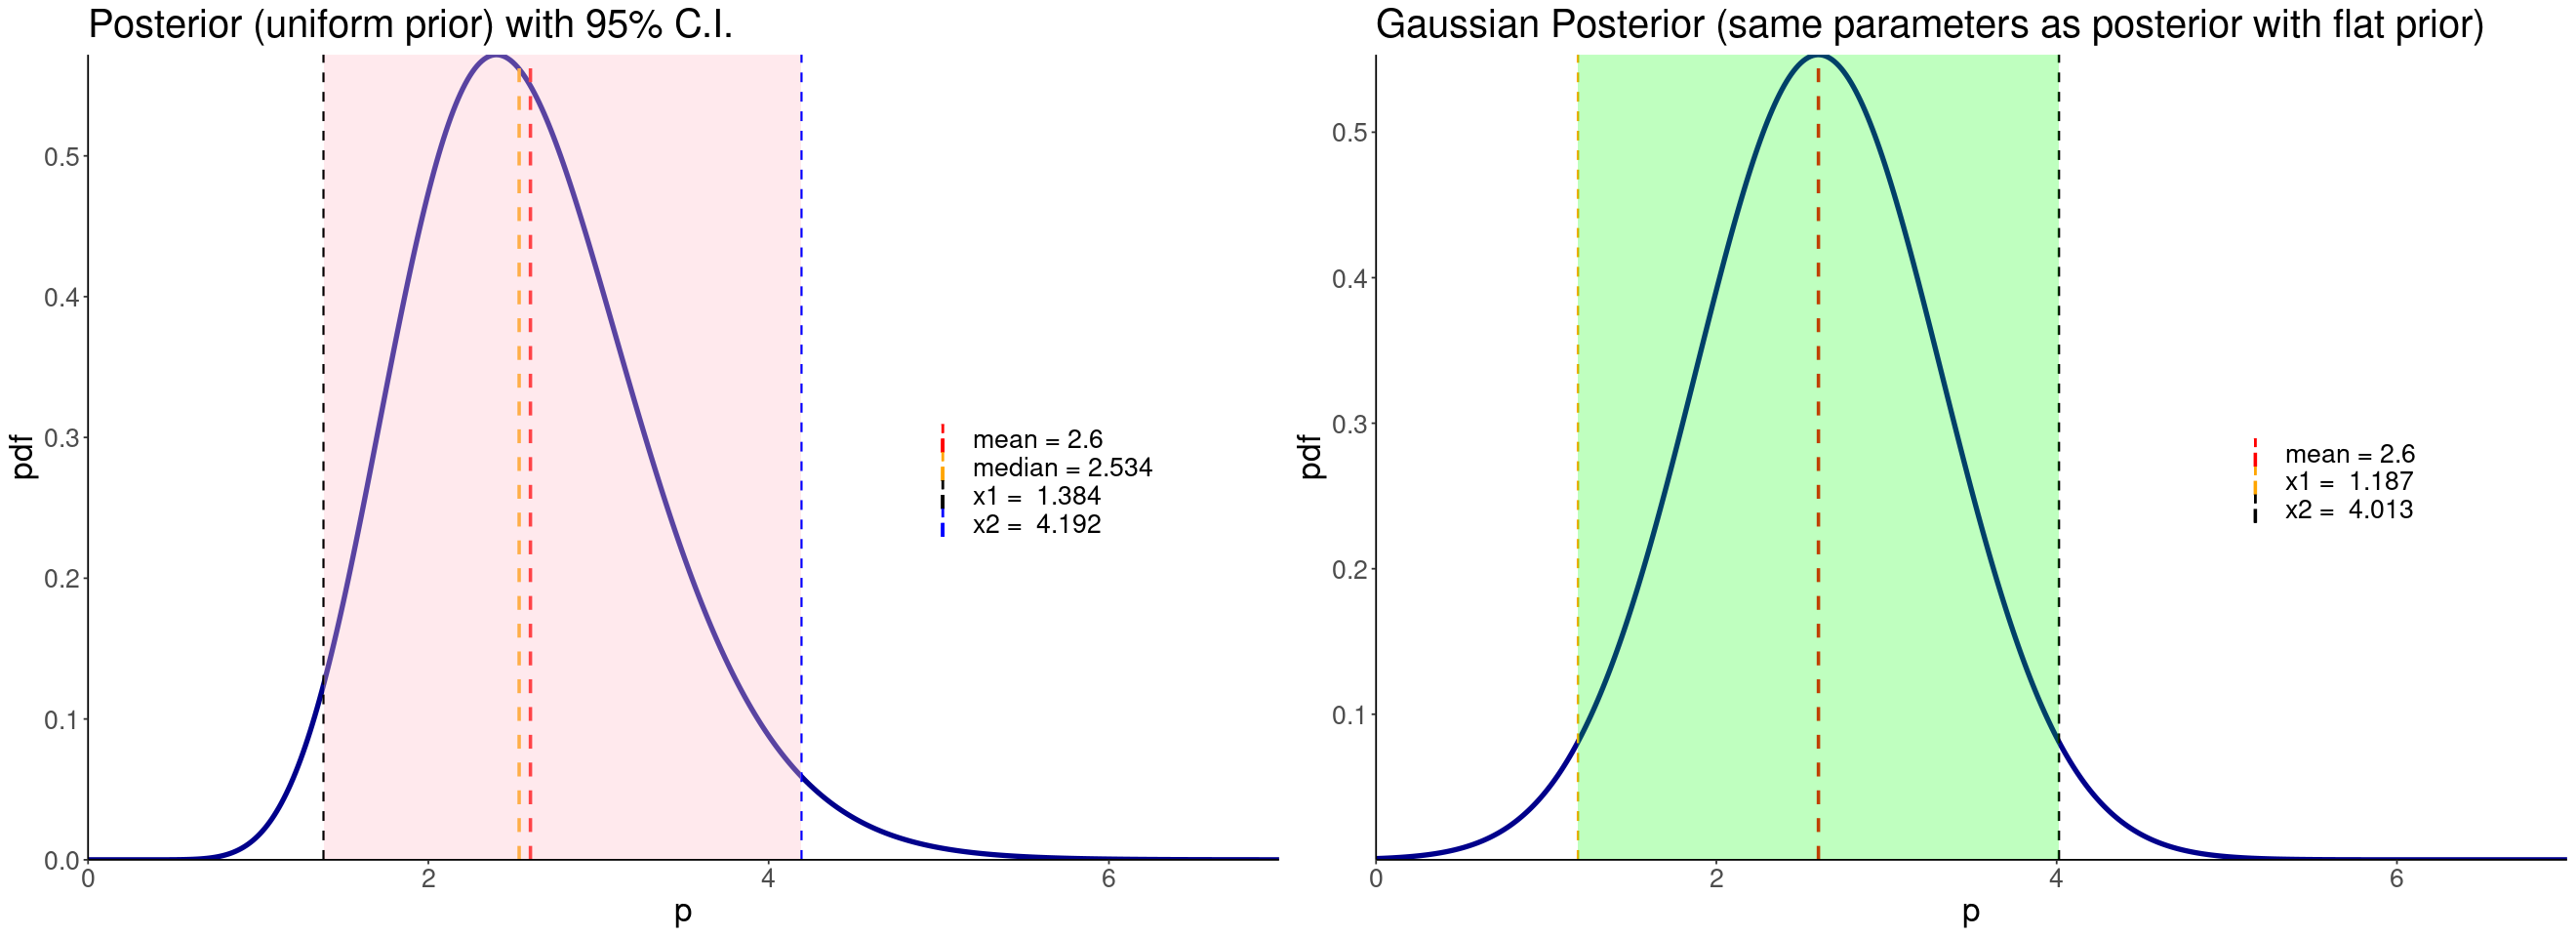

In [2]:
library("ggplot2")
library("ggpubr")


limits <- function(q, alpha, n){
    lower <- qgamma(q, shape = alpha, rate = n)
    upper <- qgamma(1-q, shape = alpha, rate = n)
    return(c(lower, upper))
}

q = 0.025 # quantile for two tailed 95% C.I

unif_cutoffs <- limits(0.025,alpha_unif,n)
jeff_cutoffs <- limits(0.025,alpha_jeff,n)


#-------------UNIFORM PRIOR CREDIBIILITY INTERVAL--------------#



unif_post_with_cred <-  ggplot() +
            geom_line(data = df_prob, mapping = aes(x=p, y= df_prob[,3]), color = 'darkblue', size = 1.5) +
            theme_classic()+
            geom_vline(aes(xintercept = unif_mean_the , colour = paste('mean =', round(unif_mean_the, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = unif_median , colour = paste('median =', round(unif_median, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = unif_cutoffs[1], colour = paste('x1 = ', round(unif_cutoffs[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = unif_cutoffs[2],  colour = paste('x2 = ', round(unif_cutoffs[2], 3))), linetype = 'dashed', size = 0.7) +
            theme(text = element_text(size = 20)) +
            ggtitle('Posterior (uniform prior) with 95% C.I.')+
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c("red", "orange", "black", "blue"),
                     name = "")+
            theme(legend.position=c(0.80, 0.5))+
            geom_ribbon(data = df_prob, aes(y = df_prob[,3], xmax = unif_cutoffs[2],xmin = unif_cutoffs[1]), fill = 'pink', alpha = 0.35)


#-------------JEFFREY'S PRIOR CREDIBIILITY INTERVAL--------------#


jeff_post_with_cred <-  ggplot() +
            geom_line(data = df_prob, mapping = aes(x=p, y= df_prob[,5]), color = 'darkblue', size = 1.5) +
            theme_classic()+
            geom_vline(aes(xintercept = jeff_mean_the , colour = paste('mean =', round(jeff_mean_the, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = jeff_median , colour = paste('median =', round(jeff_median, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = jeff_cutoffs[1], colour = paste('x1 = ', round(jeff_cutoffs[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = jeff_cutoffs[2],  colour = paste('x2 = ', round(jeff_cutoffs[2], 3))), linetype = 'dashed', size = 0.7) +
            theme(text = element_text(size = 20)) +
            ggtitle('Posterior (Jeffrey\'s prior) with 95% C.I.')+
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c("red", "orange", "black", "blue"),
                     name = "")+
            theme(legend.position=c(0.80, 0.5))+
            geom_ribbon(data = df_prob, aes(y = df_prob[,5], xmax = jeff_cutoffs[2],xmin = jeff_cutoffs[1]), fill = 'pink', alpha = 0.35)




#-------------GAUSSIANS CREDIBIILITY INTERVAL--------------#



norm_limits <- function(q, mean, std){
    lower <- qnorm(q, mean = mean, sd = std)
    upper <- qnorm(1-q, mean = mean, sd = std)
    return(c(lower, upper))
}

norm_unif_cutoffs <- norm_limits(q, unif_mean_the, sqrt(unif_var_the) )
norm_jeff_cutoffs <- norm_limits(q, jeff_mean_the, sqrt(jeff_var_the) )



post_same_as_unif <- dnorm(p, mean = unif_mean_the, sd = sqrt(unif_var_the))
post_same_as_jeff<- dnorm(p, mean = jeff_mean_the, sd = sqrt(jeff_var_the))




df_norm <- data.frame(p, post_same_as_unif, post_same_as_jeff)

norm_unif_post_with_cred <-  ggplot() +
            geom_line(data = df_norm,  mapping = aes(x=p, y= df_norm[,2]), color = 'darkblue', size = 1.5) +
            theme_classic()+
            geom_vline(aes(xintercept = unif_mean_the , colour = paste('mean =', round(unif_mean_the, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = norm_unif_cutoffs[1], colour = paste('x1 = ', round(norm_unif_cutoffs[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = norm_unif_cutoffs[2],  colour = paste('x2 = ', round(norm_unif_cutoffs[2], 3))), linetype = 'dashed', size = 0.7) +
            theme(text = element_text(size = 20)) +
            ggtitle('Gaussian Posterior (same parameters as posterior with flat prior)')+
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c("red", "orange", "black", "blue"),
                     name = "")+
            theme(legend.position=c(0.80, 0.5))+
            geom_ribbon(data = df_norm, aes(y = df_norm[,2], xmax = norm_unif_cutoffs[2],xmin = norm_unif_cutoffs[1]), fill = 'green', alpha = 0.25)


norm_jeff_post_with_cred <-  ggplot() +
            geom_line(data = df_norm, mapping = aes(x=p, y= df_norm[,3]), color = 'darkblue', size = 1.5) +
            theme_classic()+
            geom_vline(aes(xintercept = jeff_mean_the , colour = paste('mean =', round(jeff_mean_the, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = norm_jeff_cutoffs[1], colour = paste('x1 = ', round(norm_jeff_cutoffs[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = norm_jeff_cutoffs[2],  colour = paste('x2 = ', round(norm_jeff_cutoffs[2], 3))), linetype = 'dashed', size = 0.7) +
            theme(text = element_text(size = 20)) +
            ggtitle('Gaussian Posterior (same parameters as posterior with Jeffrey\'s prior)')+
            scale_x_continuous(name= 'p',expand = c(0, 0))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0))+
            scale_color_manual(values=c("red", "orange", "black", "blue"),
                     name = "")+
            theme(legend.position=c(0.80, 0.5))+
            geom_ribbon(data = df_norm, aes(y = df_norm[,3], xmax = norm_jeff_cutoffs[2],xmin = norm_jeff_cutoffs[1]), fill = 'green', alpha = 0.25)




#-------------RESULTS--------------#



cat(paste('\n The 95% C.I  for the posterior given a uniform prior is : [', round(unif_cutoffs[1],3),',', round(unif_cutoffs[2],3), ']'))
cat(paste('\n The 95% C.I  for the gaussian posterior with same parameters is : [', round(norm_unif_cutoffs[1],3),',', round(norm_unif_cutoffs[2],3), ']'))
cat(paste('\n The relative error for both cutoffs is respectively: (', round(abs(norm_unif_cutoffs[1] - unif_cutoffs[1])/unif_cutoffs[1], 3), round(abs(norm_unif_cutoffs[2] - unif_cutoffs[2])/unif_cutoffs[2], 3)), ')', "")

ggarrange(unif_post_with_cred, norm_unif_post_with_cred, nrow = 1, ncol = 2)



 The 95% C.I for the posterior given Jeffrey's prior is : [ 1.312 , 4.065 ]
 The 95% C.I  for the gaussian posterior with same parameters is : [ 1.114 , 3.886 ]
 The relative error for both cutoffs is respectively: ( 0.151 0.044 ) 

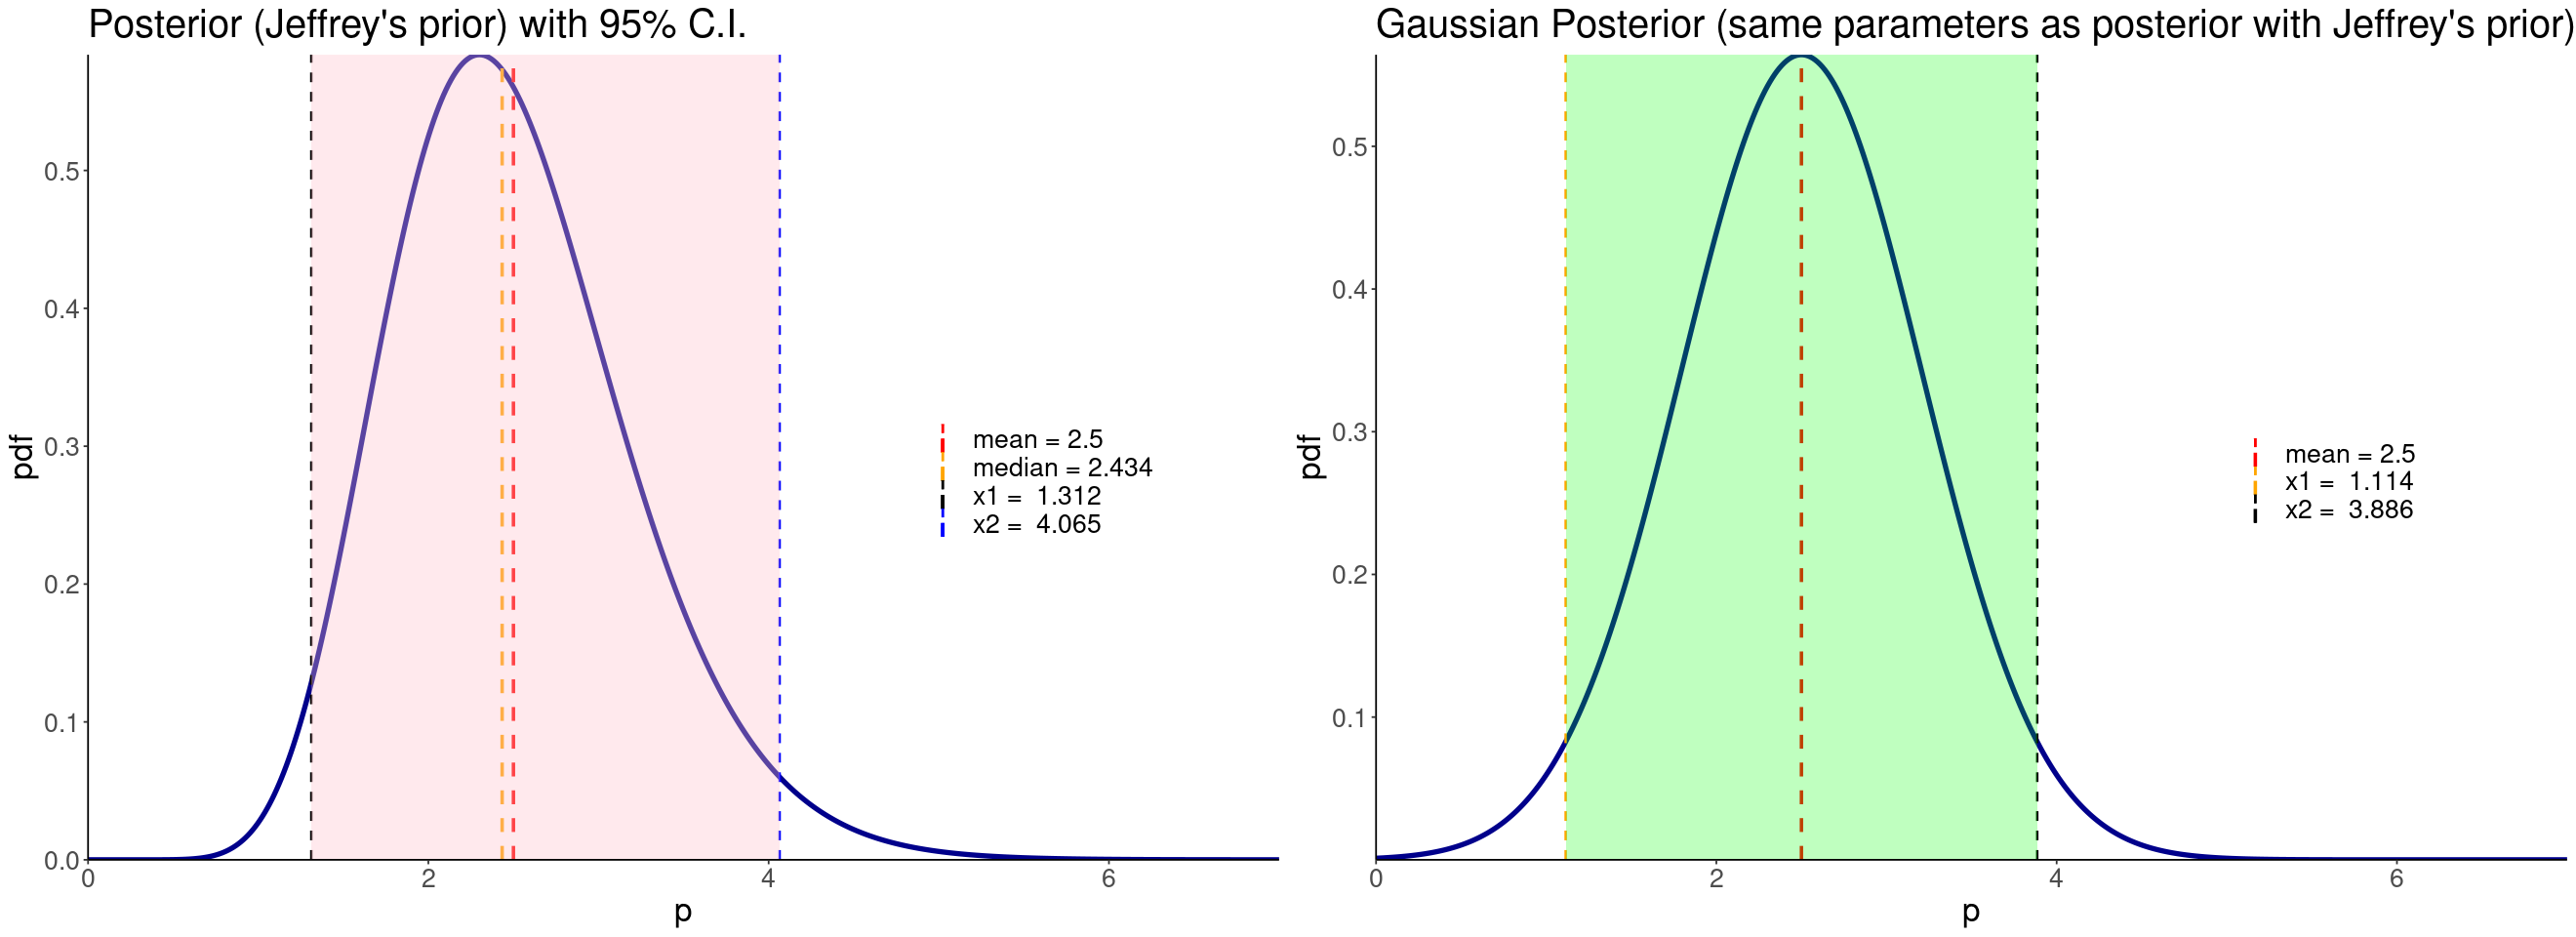

In [3]:
cat(paste('\n The 95% C.I for the posterior given Jeffrey\'s prior is : [', round(jeff_cutoffs[1],3),',', round(jeff_cutoffs[2],3), ']'))
cat(paste('\n The 95% C.I  for the gaussian posterior with same parameters is : [', round(norm_jeff_cutoffs[1],3),',', round(norm_jeff_cutoffs[2],3), ']'))
cat(paste('\n The relative error for both cutoffs is respectively: (', round(abs(norm_jeff_cutoffs[1] - jeff_cutoffs[1])/jeff_cutoffs[1], 3), round(abs(norm_jeff_cutoffs[2] - jeff_cutoffs[2])/jeff_cutoffs[2], 3)), ')', "")

ggarrange(jeff_post_with_cred, norm_jeff_post_with_cred, nrow = 1, ncol = 2)



# Exercise 2

## Given the problem of the lightouse discussed last week, study the case in which both the position along the shore (α) and the distance parameter out at sea estimation (β) are unknown.

In [4]:
real_alpha <- 12
real_beta <- 18

grid_step <- 0.01
alpha_min <- 4
alpha_max <- 20
beta_min <- 4
beta_max <- 20


alpha <- seq(alpha_min, alpha_max, length.out = 1/grid_step)
beta <- seq(beta_min, beta_max, length.out = 1/grid_step)


log_like <- function(a, b, data) {
    log_L <- 0
    for (x in data) {
        log_L <- log_L + log(b) - log(b^2 + (x-a)^2)
    }
    return(log_L)
}

In [5]:
par(mfrow=c(3, 3), cex.main = 3, cex.lab=3, cex.axis=2, mar=c(7,7,7,7))
options(repr.plot.width=26,repr.plot.height=26)

n <- c(1, 2, 5, 10, 20, 50, 100, 150, 200)

for (y in n){

    z <- matrix(data=NA, nrow=length(alpha), ncol=length(beta))
    theta <- runif(y, -pi/2, pi/2)
    dt <- real_beta * tan(theta) + real_alpha 
  
# The first row of this matrix is the log-likelyhood calculated with the first value of alpha (from the grid), each column
# corresponds to a possible value of beta (which comes from our defined grid).
    
    for(i in 1:length(alpha)) {
        for(j in 1:length(beta)) {
            z[i,j] <- log_like(alpha[i], beta[j], dt)
            }
        }
    z <- z - max(z)
    contour(alpha, beta, exp(z),  col = "blue",
            xlab=expression(alpha), ylab=expression(beta), main=paste("Position estimation with ", y, "flashes"))
    abline (v = real_alpha, h = real_beta, col="red", lty=3, lwd=2)
    grid()
}

### To marginalize over one parameter we take the constructed matrix (of log likelyhoods), take the exponential and we "sum over" one dimension. 

In [6]:
par(mfrow=c(3, 3), cex.main = 3, cex.lab=3, cex.axis=2, mar=c(7,7,7,7))
options(repr.plot.width=26,repr.plot.height=26)

n <- c(1, 2, 5, 10, 20, 50, 100, 150, 200)

for (y in n){

    z <- matrix(data=NA, nrow=length(alpha), ncol=length(beta))
    theta <- runif(y, -pi/2, pi/2)
    dt <- real_beta * tan(theta) + real_alpha 
  
# The first row of this matrix is the log-likelyhood calculated with the first value of alpha (from the grid), each column
# corresponds to a possible value of beta (which comes from our defined grid).
    
    for(i in 1:length(alpha)) {
        for(j in 1:length(beta)) {
            z[i,j] <- log_like(alpha[i], beta[j], dt)
            }
        }
    z <- z - max(z)
    
    #Remember that in each row, the value of alpha is fixed, beta varies as we change columns.
    #For each alpha, sum over all values in that row-> which means sum over all betas, which means we marginalize on (each) alpha
    post_marg_alpha <- apply(exp(z), 1, sum)
    post_marg_alpha_norm <- post_marg_alpha/(grid_step * sum(post_marg_alpha))
    
    
    plot(alpha,post_marg_alpha_norm,  col = "navy",
            xlab=expression(alpha), ylab='Posterior', main=paste("Marginalized (on α) posterior with ", y, "flashes"))
    abline (v = real_alpha, col="red", lty=3, lwd=2)
    grid()
}

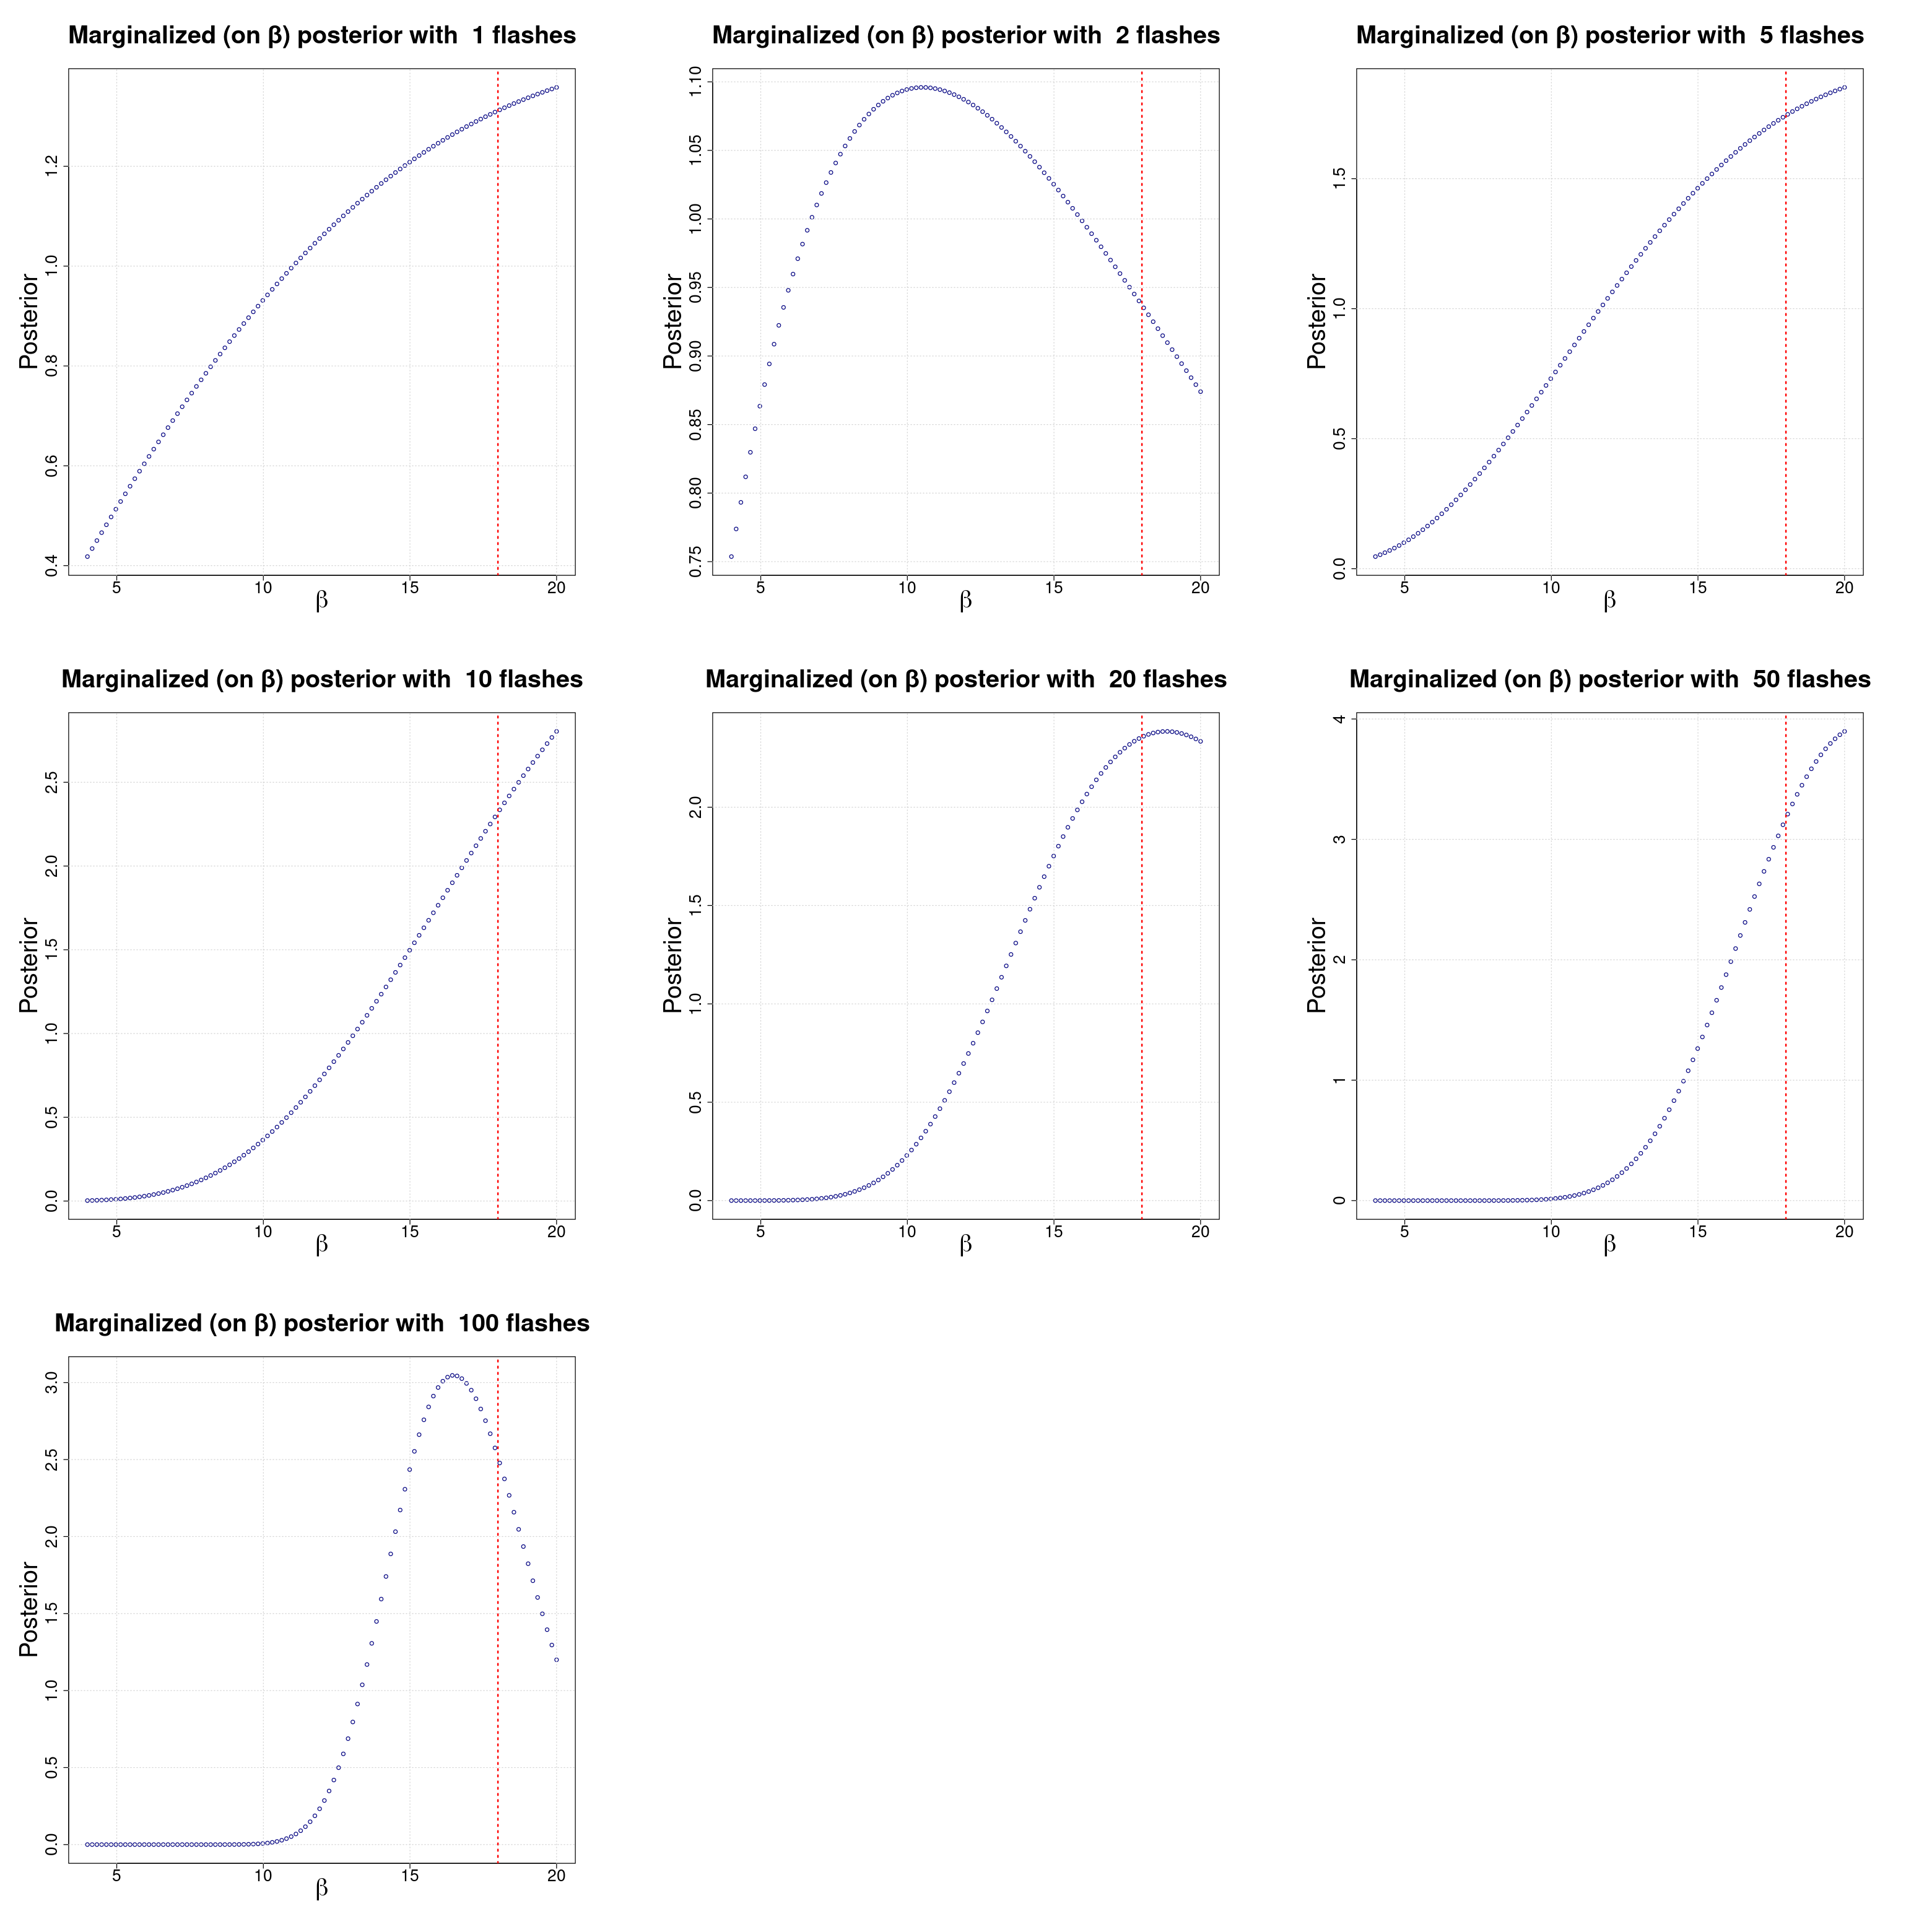

In [7]:
par(mfrow=c(3, 3), cex.main = 3, cex.lab=3, cex.axis=2, mar=c(7,7,7,7))
options(repr.plot.width=26,repr.plot.height=26)

n <- c(1, 2, 5, 10, 20, 50, 100)

for (y in n){

    z <- matrix(data=NA, nrow=length(alpha), ncol=length(beta))
    theta <- runif(y, -pi/2, pi/2)
    dt <- real_beta * tan(theta) + real_alpha 
  
    for(i in 1:length(alpha)) {
        for(j in 1:length(beta)) {
            z[i,j] <- log_like(alpha[i], beta[j], dt)
            }
        }
    z <- z - max(z)

#Remember that in each column, the value of beta is fixed, alpha varies as we change rows.
#For each beta, sum over all values in that column-> which means sum over all alphas, which means we marginalize on (each) beta
    post_marg_beta <- apply(exp(z), 2, sum)
    post_marg_beta_norm <- post_marg_beta/(grid_step * sum(post_marg_beta))
    
    
    plot(beta,post_marg_beta_norm,  col = "navy",
            xlab=expression(beta), ylab='Posterior', main=paste("Marginalized (on β) posterior with ", y, "flashes"))
    abline (v = real_beta, col="red", lty=3, lwd=2)
    grid()
}

# Exercise 3

## Given the signal over background example discussed last week, analyze and discuss the following cases: 

## Vary the sampling resolution used to generate the data, keeping the same sampling range xdat<- seq(from = -7w , to = 7w, by = 0.5w)
- change the resolution w = {0.1, 0.25, 1, 2, 3}
- check the effect on the results





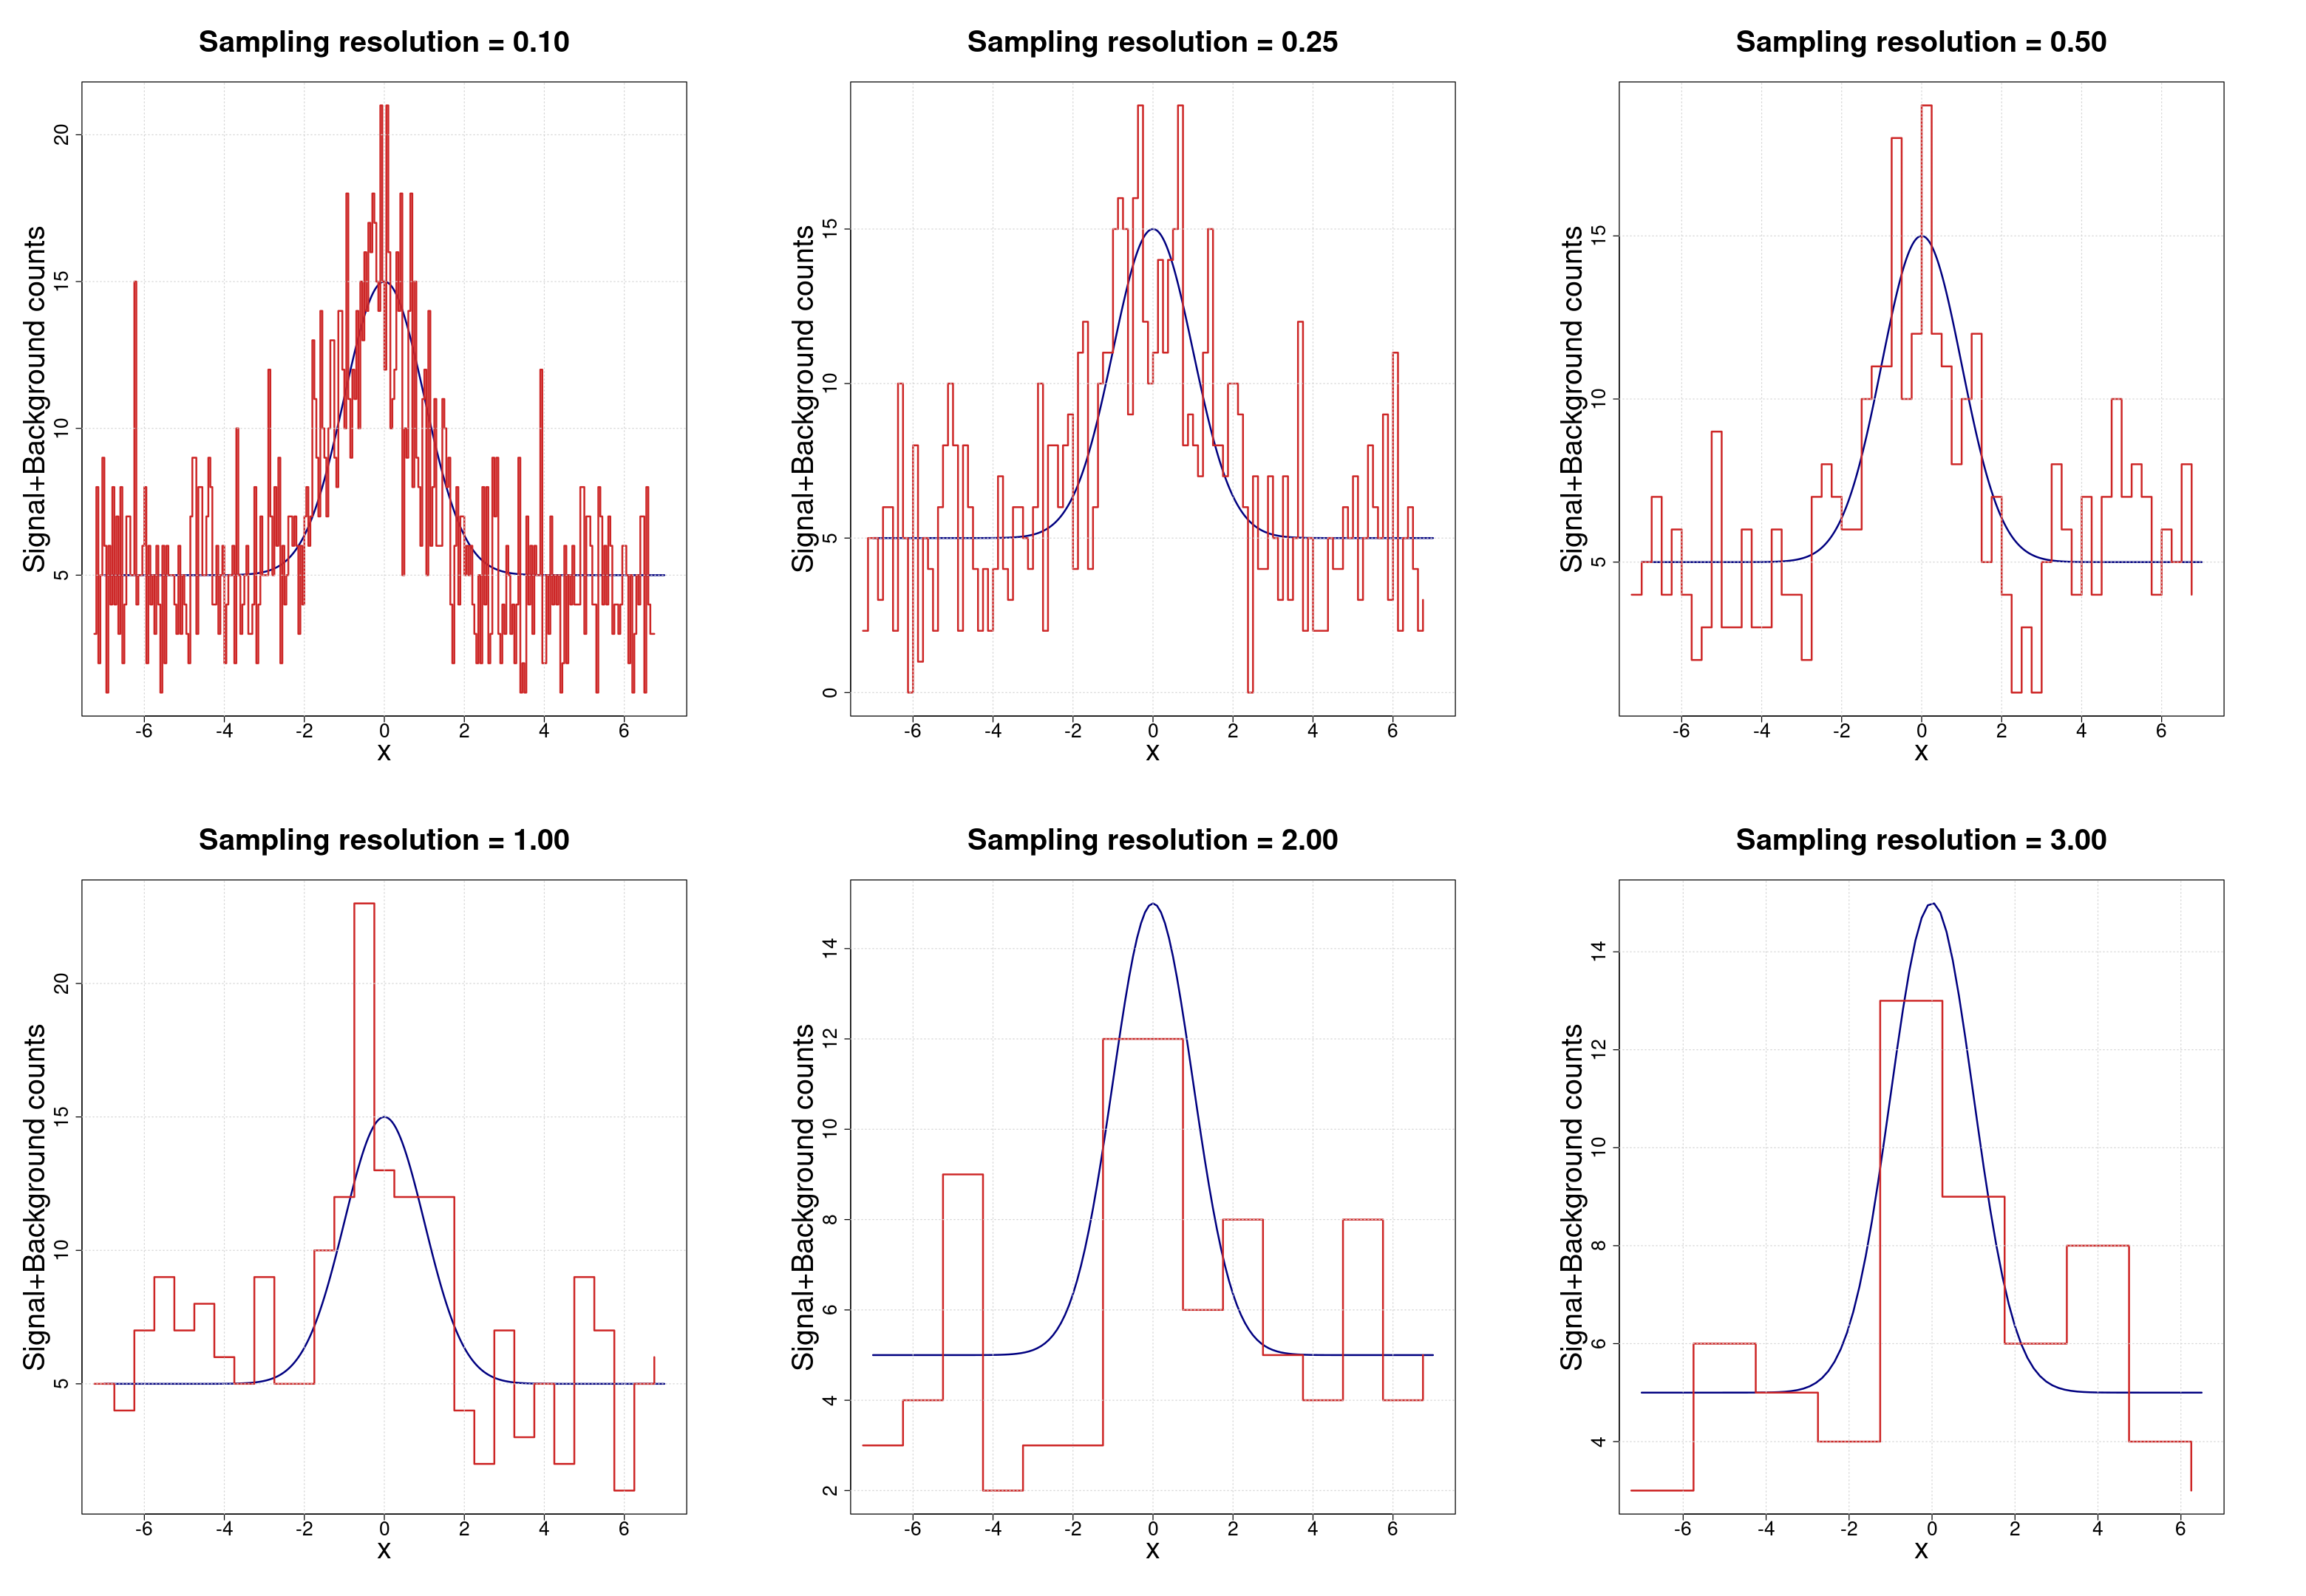

In [8]:
#Generative model
signal <- function(x, a, b, x0, w, t) { 
    t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
}

# Model parameters
x0      <- 0  # Signal peak
A_true  <- 2  # Signal amplitude
B_true  <- 1  # Background amplitude
Delta_t <- 5  # Exposure time
w       <- 1  # Signal width

ws <- c(0.1, 0.25, 0.5, 1, 2, 3) #resolutions



par(mfrow=c(2, 3), cex.main = 3, cex.lab=3, cex.axis=2, mar=c(7,7,7,7))
options(repr.plot.width=26, repr.plot.height=18)

for (x in ws) {
    xdata  <- seq(from=-7*w, to=7*w, by=0.5*x)
    s.true <- signal(xdata, A_true, B_true, x0, w, Delta_t)
    ddata  <- rpois(length(s.true), s.true)
    
    xplot <- seq(from=min(xdata), to=max(xdata), by=0.05*x)
    splot <- signal(xplot, A_true, B_true, x0, w, Delta_t)
    
    plot(xplot, splot, type="l", col="navy", lwd=2,
         xlab="x", ylab="Signal+Background counts", main=sprintf("Sampling resolution = %1.2f", x),
         xlim=range(xplot), ylim=range(c(splot, ddata)))
    
    xdata.off <- xdata - 0.25
    lines(xdata.off, ddata, type="s", col="firebrick3", lwd=2)
    grid()
}



In [9]:
#Computing posterior


log_post <- function (d, x, a, b, x0, w, t) {
if(a<0 || b <0) { return (-Inf )} # the effect of the prior
sum( dpois(d, lambda = signal (x, a, b, x0, w, t), log=TRUE ))
}



#Define values + grid

A_true  <- 2  # Signal amplitude
B_true  <- 1 # Background amplitude
grid_step <- 0.01
A_min <- 0
A_max <- 6
B_min <- 0
B_max <- 4
A <- seq(A_min, A_max, length.out = 1/grid_step)
B <- seq(B_min, B_max, length.out = 1/grid_step)
    

par(mfrow=c(2, 3), cex.main = 3, cex.lab=3, cex.axis=2, mar=c(7,7,7,7))
options(repr.plot.width=26,repr.plot.height=18)


for (x in ws){
        
    xdata  <- seq(from=-7*w, to=7*w, by=0.5*x)
    s.true <- signal(xdata, A_true, B_true, x0, w, Delta_t)
    ddata  <- rpois(length(s.true), s.true)
    xplot <- seq(from=min(xdata), to=max(xdata), by=0.5*x)
    splot <- signal(xplot, A_true, B_true, x0, w, Delta_t)
    xdata.off <- xdata - x/2

    
    
    z <- matrix(data=NA, nrow=length(A), ncol=length(B))
    
    
    for(i in 1:length(A)) {
        for(j in 1:length(B)) {
            z[i,j] <- log_post(ddata, xdata, A[i], B[j], x0, w, Delta_t)
            }
        }
    z <- z - max(z)
    contour(A, B, exp(z),  col = "blue",
            xlab=expression(A), ylab=expression(B), main=paste("Parameter estimation with sampling resolution = ", x))
    abline (v = A_true, h = B_true, col="red", lty=3, lwd=2)
    grid()
}

cat('\n The plots below show the parameter estimation for different value of sampling resolution.')



 The plots below show the parameter estimation for different value of sampling resolution.

## change the ratio A/B used to simulate the data (keeping both positive)
- check the effect on the results


The plots below show different datasets, generated by varying the signal to noise ratio, sampled with the same resolution. Clearly, by decreasing the signal to noise ratio the histogram doesn't show as clear of a peak.

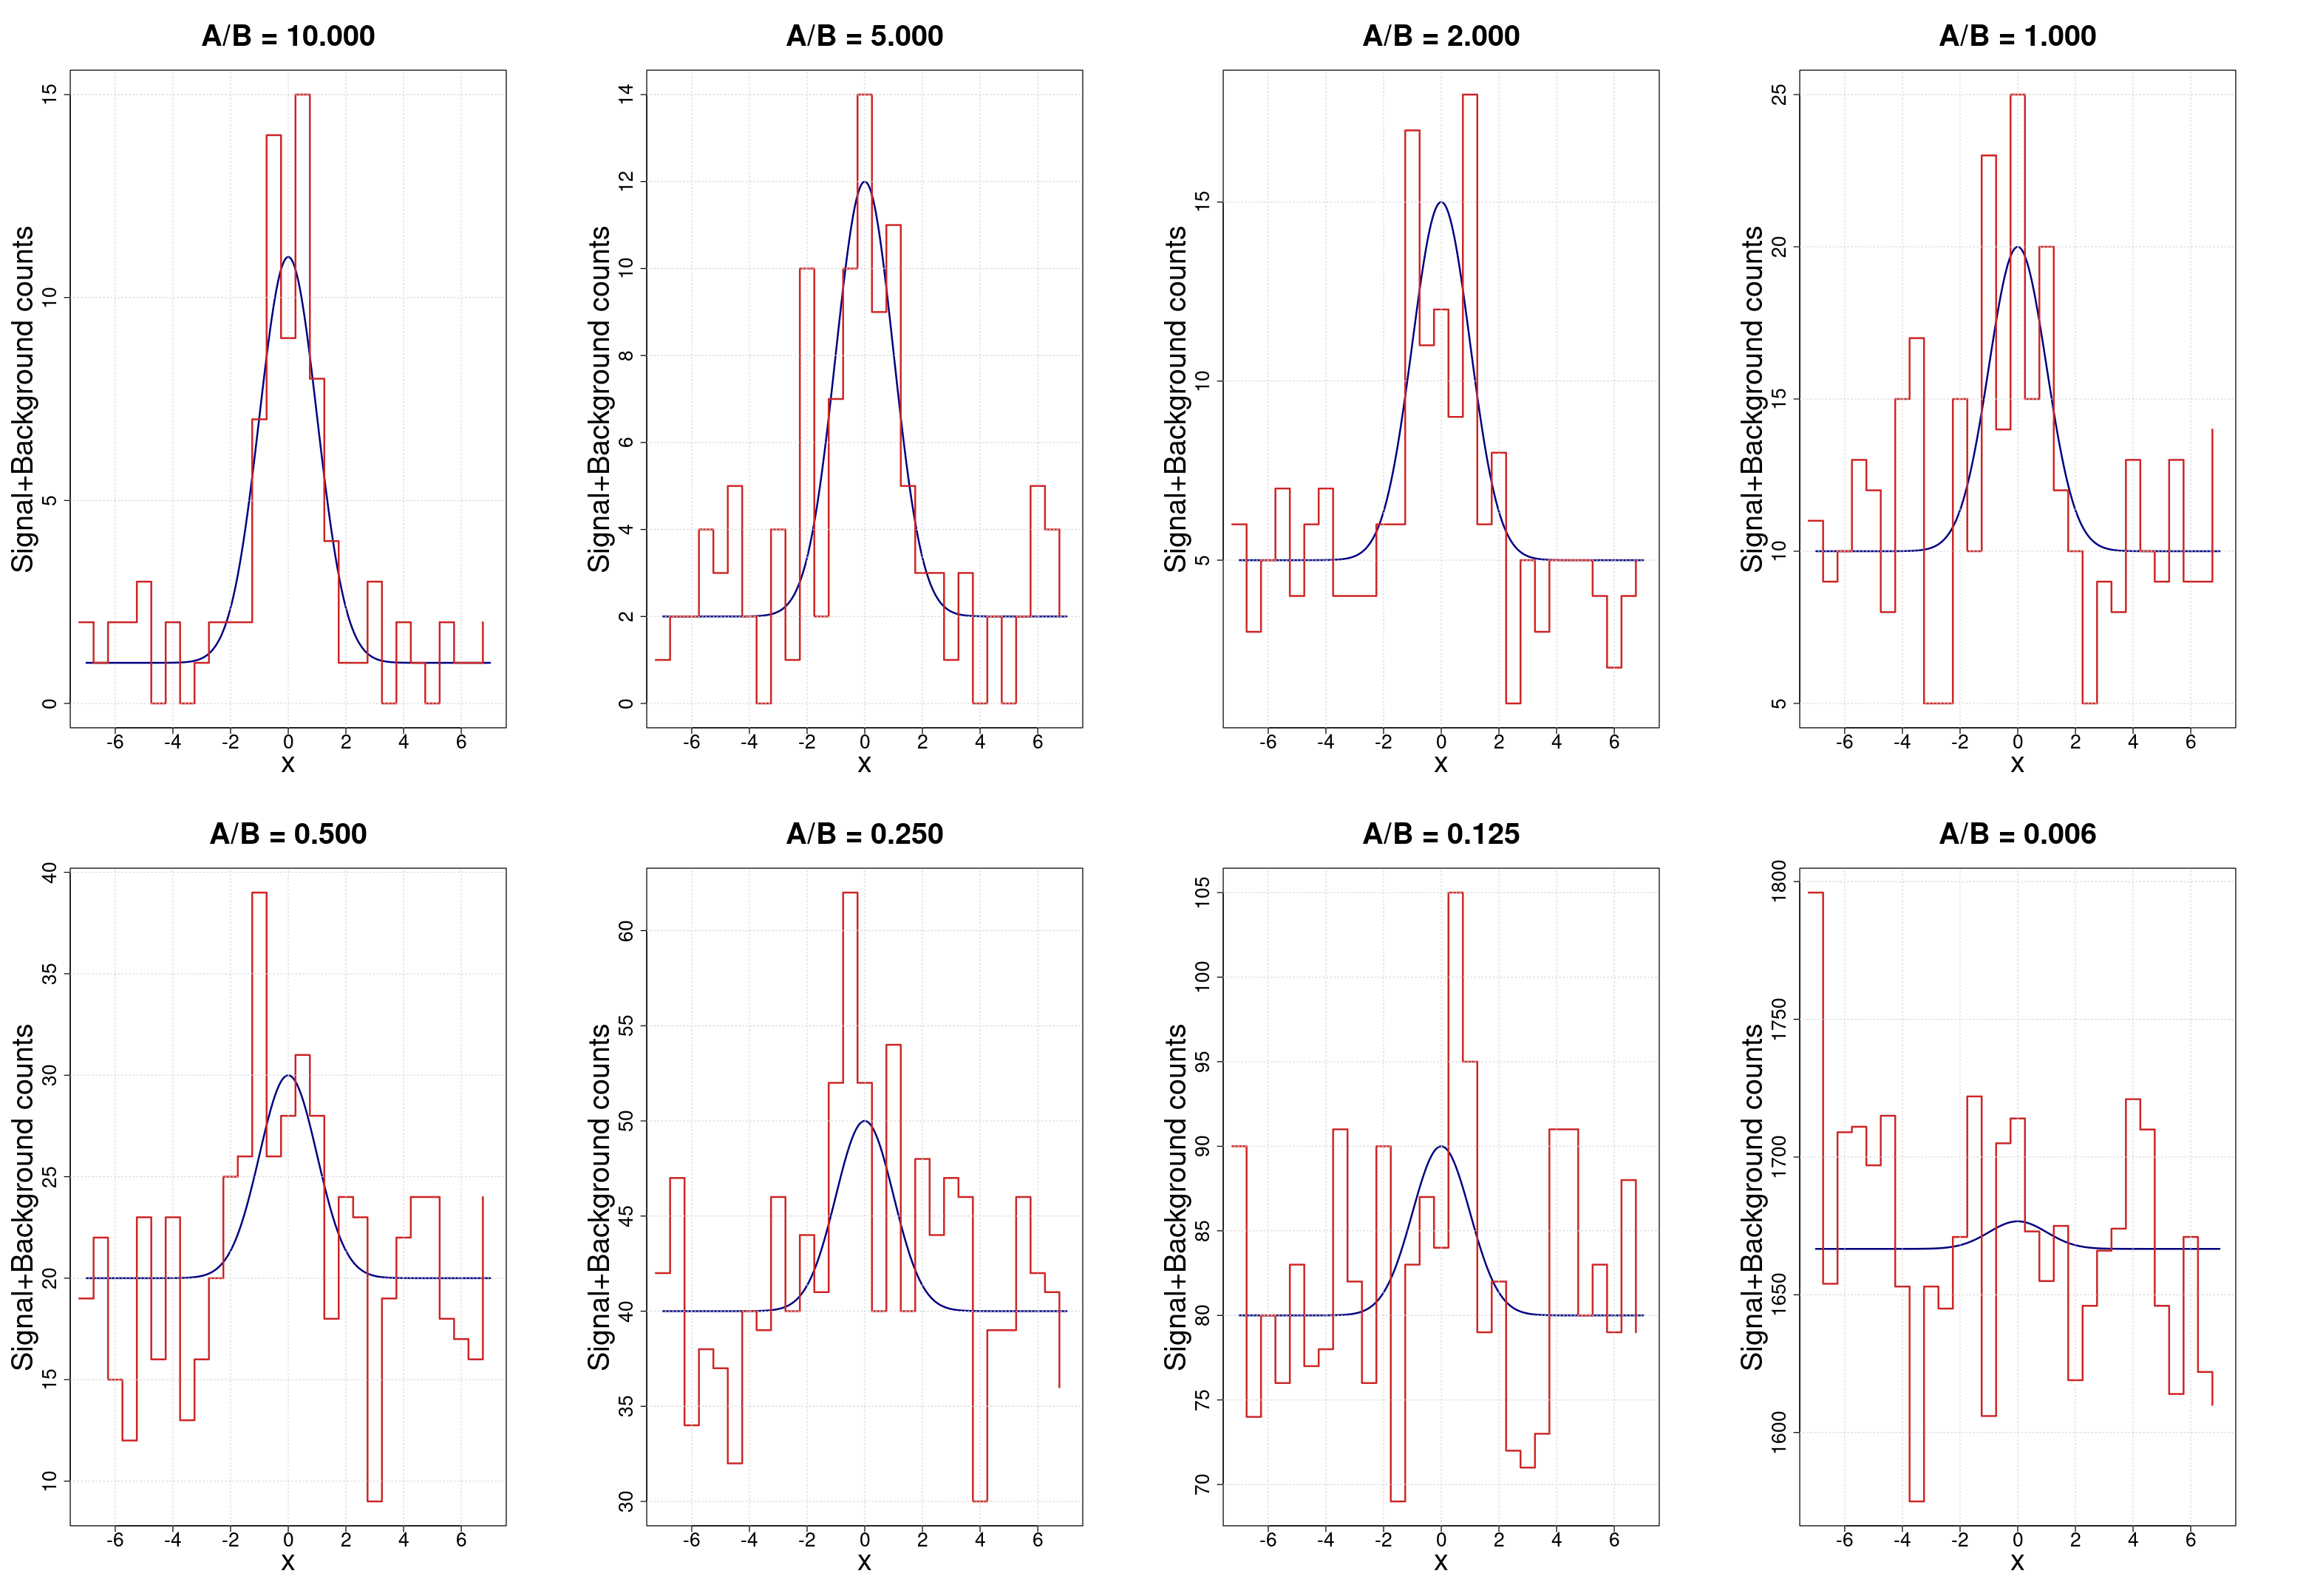

In [10]:
#Generative model
signal <- function(x, a, b, x0, w, t) { 
    t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
}

# Model parameters
x0      <- 0  # Signal peak
A_true  <- 2  # Signal amplitude
B_true  <- A_true / c(10, 5, 2, 1, 0.5, 0.25, 0.125, 0.006) #Background amplitude(s)
Delta_t <- 5  # Exposure time
w       <- 1  # Signal width


par(mfrow=c(2, 4), cex.main = 3, cex.lab=3, cex.axis=2, mar=c(6,6,6,6))
options(repr.plot.width=26, repr.plot.height=18)

for (b in B_true) {
    xdata  <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdata, A_true, b, x0, w, Delta_t)
    ddata  <- rpois(length(s.true), s.true)
    
    xplot <- seq(from=min(xdata), to=max(xdata), by=0.05*w)
    splot <- signal(xplot, A_true, b, x0, w, Delta_t)
    
    plot(xplot, splot, type="l", col="navy", lwd=2,
         xlab="x", ylab="Signal+Background counts", main=sprintf("A/B = %1.3f", A_true/b),
         xlim=range(xplot), ylim=range(c(splot, ddata)))
    
    xdata.off <- xdata - 0.25
    lines(xdata.off, ddata, type="s", col="firebrick3", lwd=2)
    grid()
}

cat('The plots below show different datasets, generated by varying the signal to noise ratio, sampled with the same resolution. Clearly, by decreasing the signal to noise ratio the histogram doesn\'t show as clear of a peak.')



### Parameter estimation with variable signal to noise ratio



The plots below show the parameter estimation for different ratios of signal to noise.

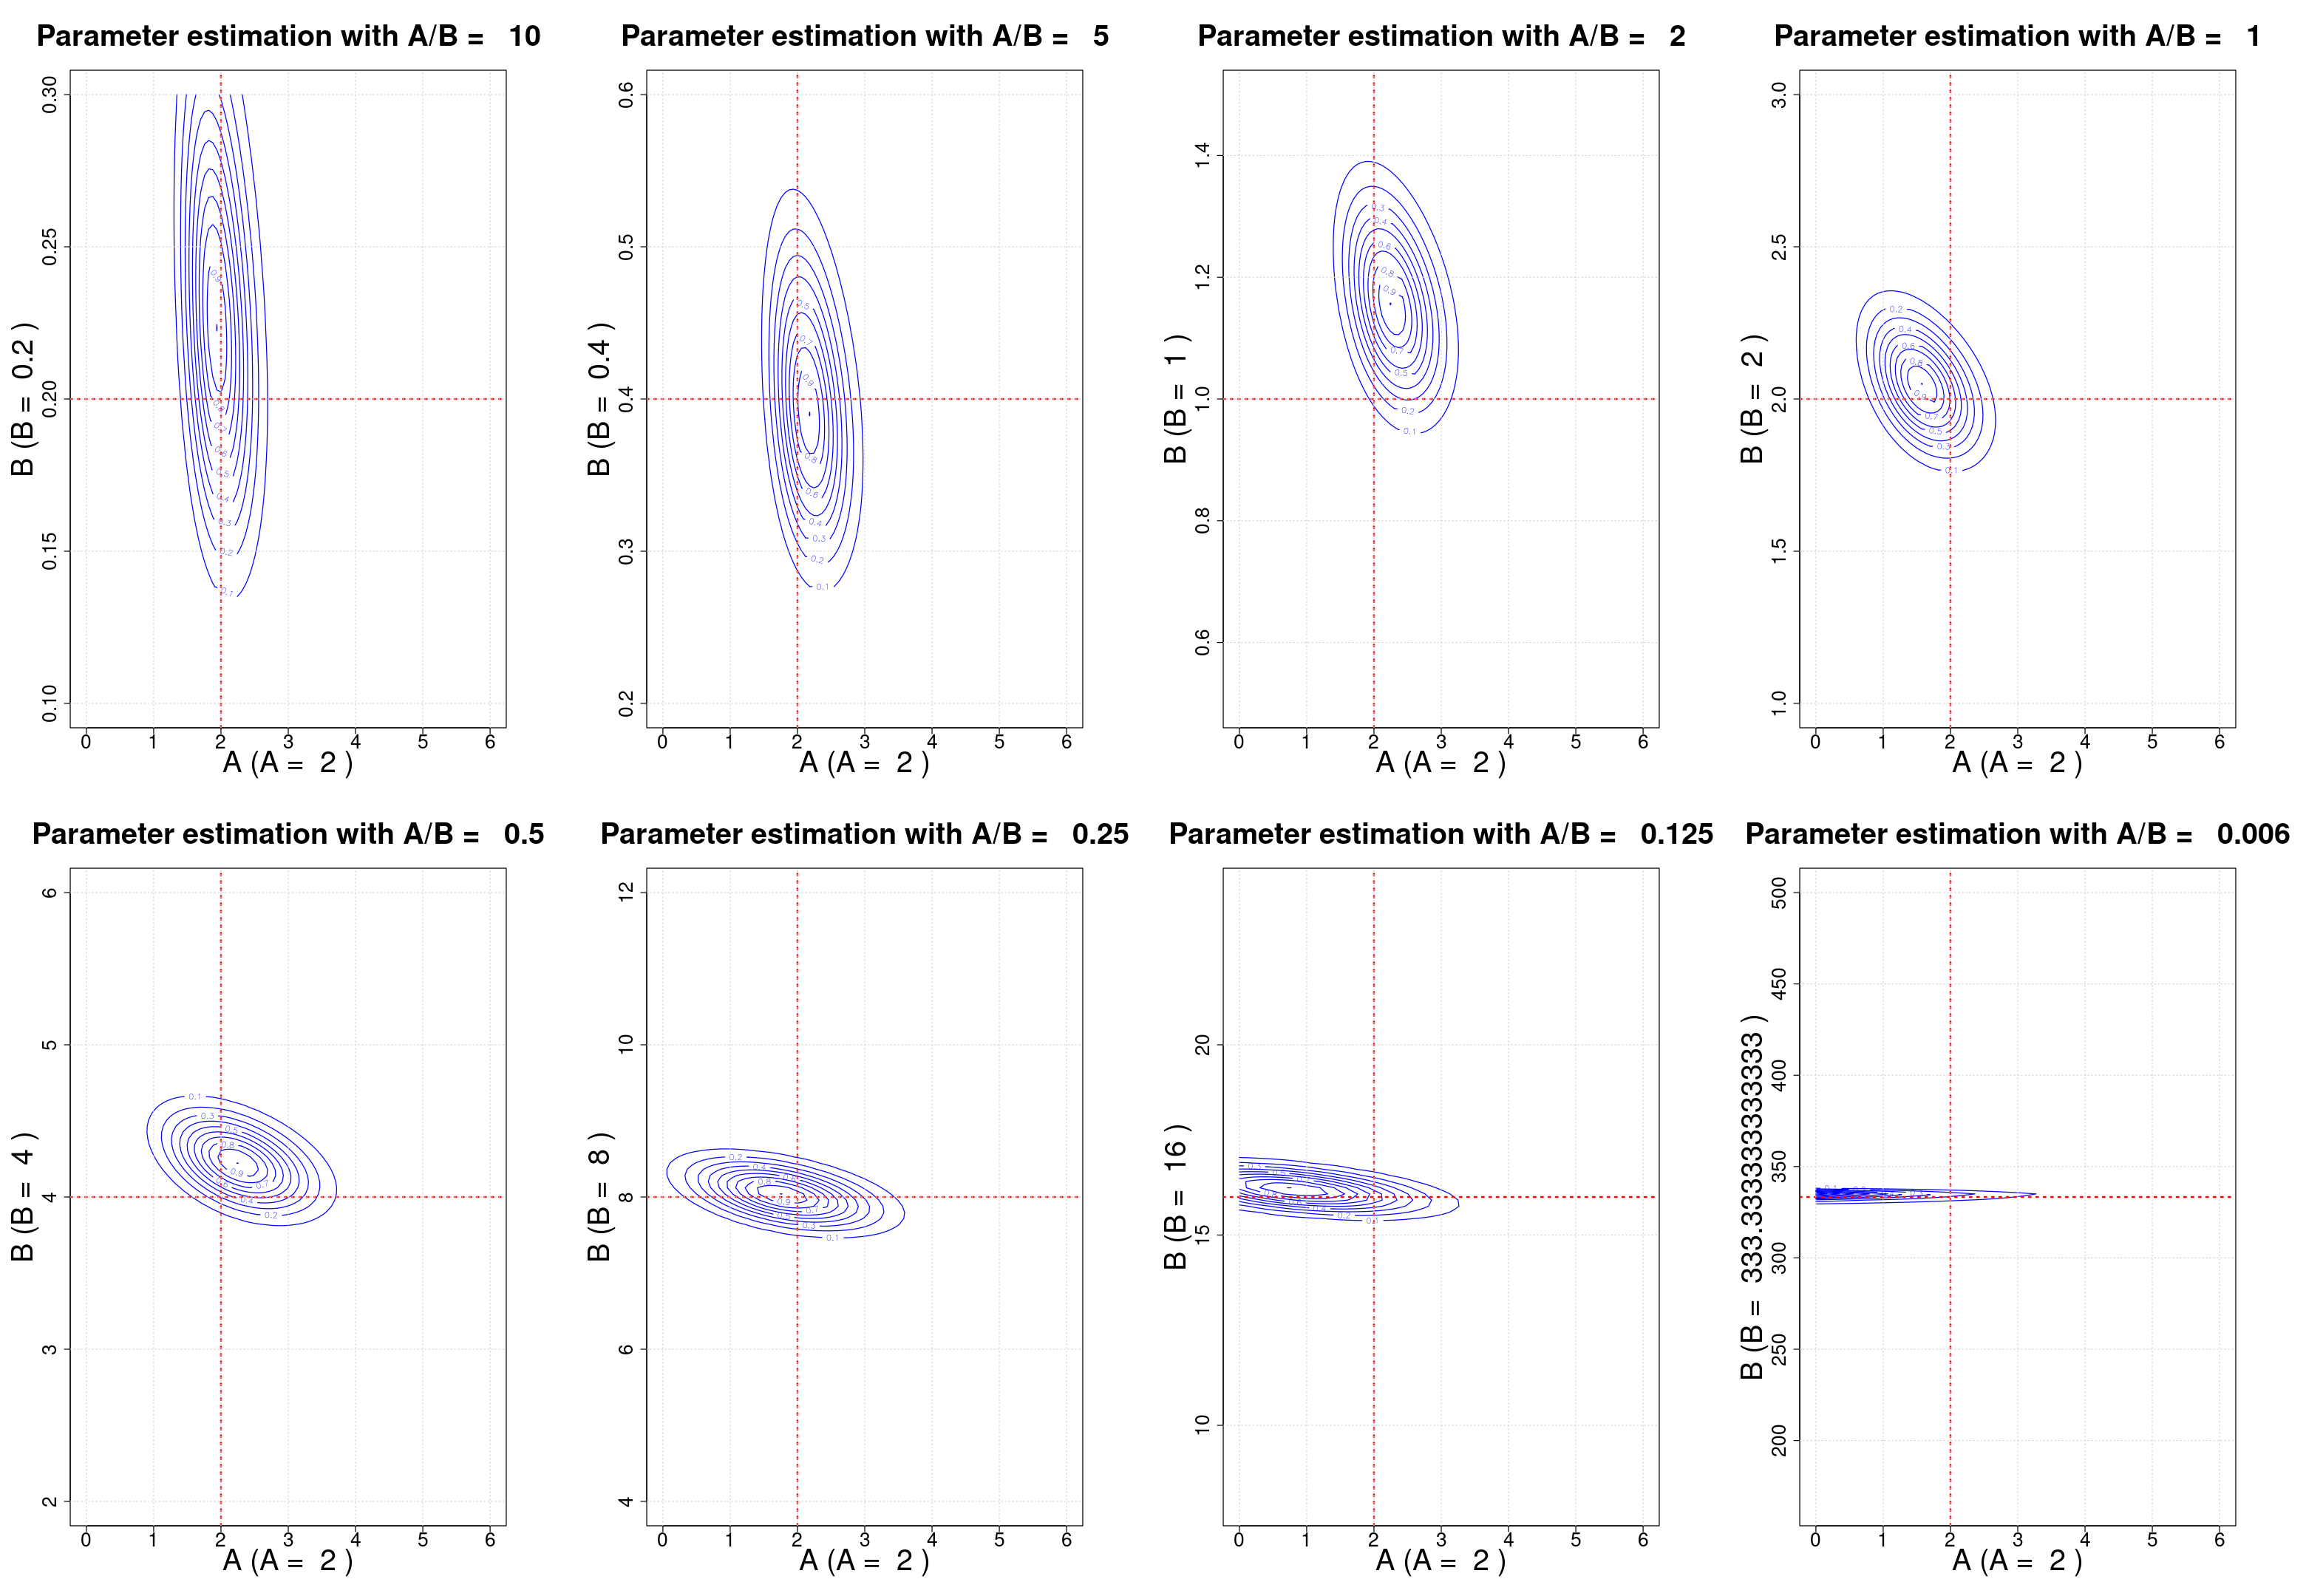

In [11]:

log_post <- function (d, x, a, b, x0, w, t) {
if(a<0 || b <0) { return (-Inf )} # the effect of the prior
sum( dpois(d, lambda = signal (x, a, b, x0, w, t), log=TRUE ))
}



#Define values + grid

A_true  <- 2  # Signal amplitude
grid_step <- 0.01
A_min <- 0
A_max <- 6
A <- seq(A_min, A_max, length.out = 1/grid_step)
    

par(mfrow=c(2, 4), cex.main = 3, cex.lab=3, cex.axis=2, mar=c(6,6,6,6))
options(repr.plot.width=26,repr.plot.height=18)


for (b in B_true){
    
    B_min <- b - b/2
    B_max <- b + b/2
    B <- seq(B_min, B_max, length.out = 1/grid_step)    
    
    xdata  <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdata, A_true, b, x0, w, Delta_t)
    ddata  <- rpois(length(s.true), s.true)
    
    xplot <- seq(from=min(xdata), to=max(xdata), by=0.05*w)
    splot <- signal(xplot, A_true, b, x0, w, Delta_t)
    
    z <- matrix(data=NA, nrow=length(A), ncol=length(B))
    
    
    for(i in 1:length(A)) {
        for(j in 1:length(B)) {
            z[i,j] <- log_post(ddata, xdata, A[i], B[j], x0, w, Delta_t)
            }
        }
    z <- z - max(z)
    contour(A, B, exp(z),  col = "blue", 
        xlab=paste('A (A = ', A_true, ')'), ylab=paste('B (B = ', b, ')'), main=paste("Parameter estimation with A/B =  ", A_true/b)) 
    abline (v = A_true, h = b, col="red", lty=3, lwd=2)
    grid()
}

cat('The plots below show the parameter estimation for different ratios of signal to noise.')
